In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy

# Apply the default theme at seaborn
sns.set_theme()

In [2]:
# Opening JSON file
file_name = './../output/output_govuk.json'

df = pd.read_json(file_name)

In [3]:
df

,name,company_number,registered_office_address,company_status,company_type,company_creation_date,nature_of_business
0,INGRAM MICRO (UK) LIMITED,01609968,"Cbxii, 406-432 Midsummer Boulevard, Milton Key...",Active,Private limited Company,29 January 1982,"46510 - Wholesale of computers, computer perip..."
1,MARKETING FACILITIES MANAGEMENT LTD,04437088,"Jupiter House, Calleva Park, Aldermaston, Read...",Dissolved,Private limited Company,13 May 2002,74990 - Non-trading company
2,SOFTWARE LTD.,SC144127,"214 214 Holburn St, Aberdeen, Scotland, AB10 6DB",Active,Private limited Company,29 April 1993,62012 - Business and domestic software develop...
3,SPENEO TECHNOLOGIES LTD,04348149,"Suite B, 29 Harley Street, London, United King...",Dissolved,Private limited Company,7 January 2002,7499 - Non-trading company
4,SOFTWARE ADD-ONS LIMITED,05387424,"1 Bailey Court Bailey Court, Colburn Business ...",Active,Private limited Company,10 March 2005,62020 - Information technology consultancy act...
...,...,...,...,...,...,...,...
1151,ALL ABOUT YOU COUNSELLING AND PSYCHOTHERAPY LTD,12186649,"Suite 18 Ealing House, 33 Hanger Lane, London,...",Active,Private limited Company,3 September 2019,86900 - Other human health activities
1152,ALL ABOUT YOU COACHING LTD,13687811,"34 Horsforth Avenue, Bridlington, England, YO1...",Active,Private limited Company,19 October 2021,96090 - Other service activities not elsewhere...
1153,ALL ABOUT YOU CARE SERVICES LIMITED,06292233,"Unit 12 Soveriegn Court, Poulton Le Fylde, Uni...",Active,Private limited Company,26 June 2007,86900 - Other human health activities
1154,ALL ABOUT WRITING LTD,13619052,"C/O Abc Accounting Unit 1, Sandars Road, Heaph...",Active,Private limited Company,14 September 2021,96090 - Other service activities not elsewhere...


In [4]:
df.isnull().sum()

name                         0
company_number               0
registered_office_address    0
company_status               0
company_type                 0
company_creation_date        0
nature_of_business           0
dtype: int64

In [5]:
#number of cells
print("Number of cells: ",df.size)

#number of rows (dataframe's instances)
print("Number of rows: ", df.shape[0])

Number of cells:  8092
Number of rows:  1156


Active               980
Dissolved            146
Liquidation           28
In Administration      2
Name: company_status, dtype: int64


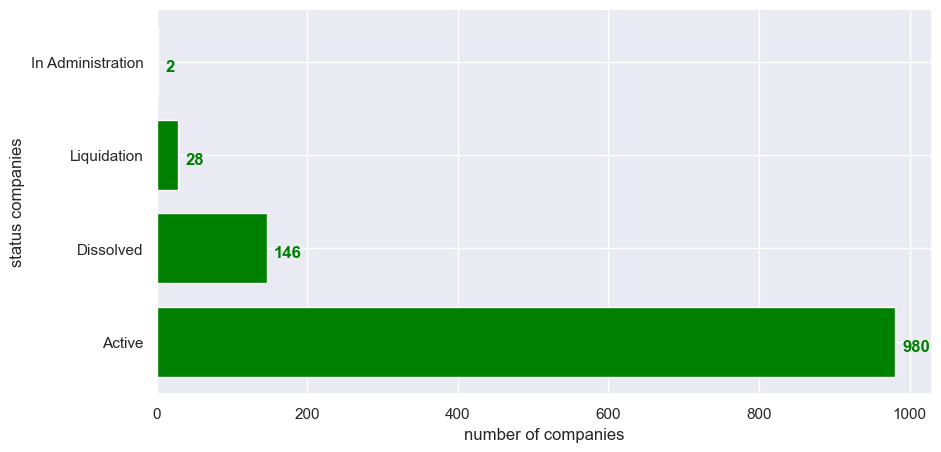

<AxesSubplot:>

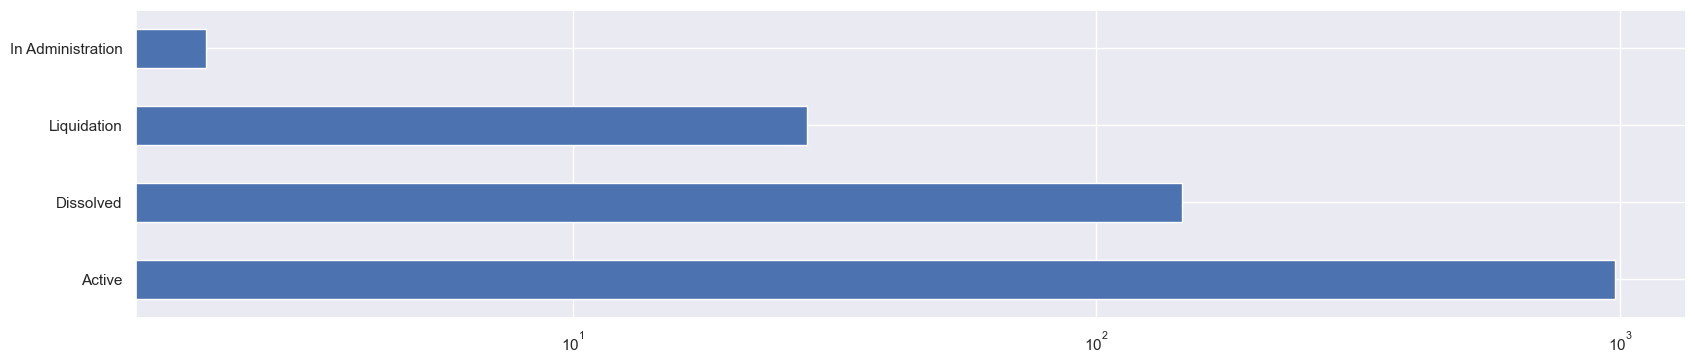

In [6]:
#status
print(df['company_status'].value_counts())
status = df['company_status'].value_counts()
type(status)
keys = status.index
values = status.values

#graph with mathplotlib
# plt.figure(figsize=(10, 4))
fig, ax = plt.subplots()
width = 0.75
fig.set_size_inches(10, 5)
ind = np.arange(len(values))
ax.barh(keys, values, width, color = "green")

for i, v in enumerate(values):
    ax.text(v + 10, i - 0.1 , str(v),
            color = 'green', fontweight = 'bold')
plt.xlabel("number of companies")
plt.ylabel("status companies")
plt.show()

#graph with seaborn with scale semilog on axis of x
plt.figure(figsize=(20,4))
plt.semilogx()
status.plot(kind='barh')

Private limited Company                                                                  1115
Private company limited by guarantee without share capital                                 33
Private Limited Company by guarantee without share capital use of 'Limited' exemption       6
Public limited Company                                                                      2
Name: company_type, dtype: int64


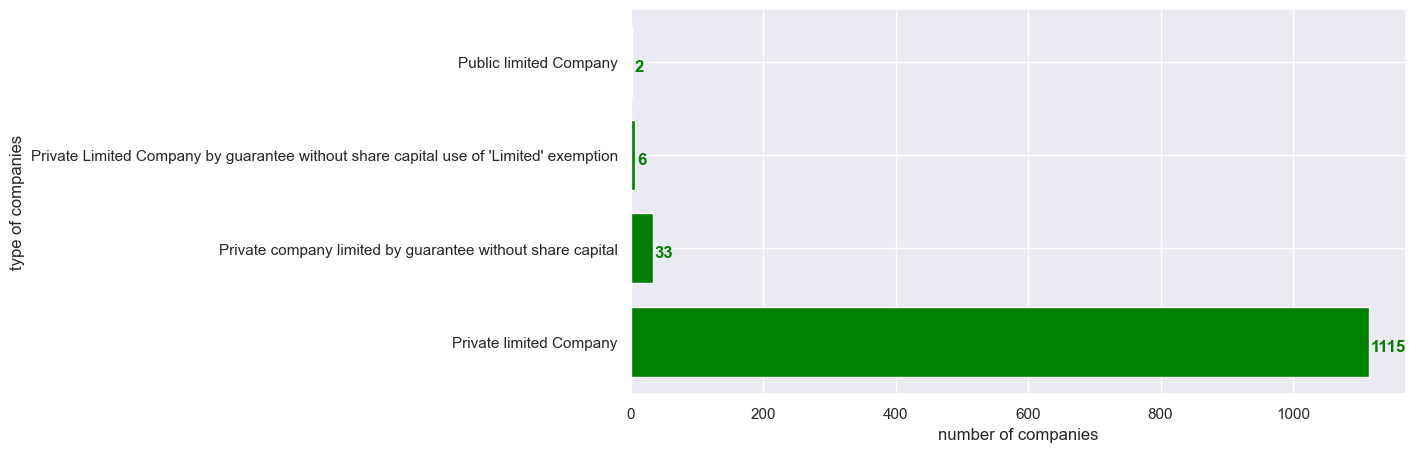

In [7]:
#type
print(df['company_type'].value_counts())
type_companies = df['company_type'].value_counts()
keys = type_companies.index
values = type_companies.values

#creation of graph for type_companies
fig, ax = plt.subplots()
width = 0.75
fig.set_size_inches(10, 5)
ind = np.arange(len(values))
ax.barh(keys, values, width, color = "green")

for i, v in enumerate(values):
    ax.text(v + 3, i - 0.1 , str(v),
            color = 'green', fontweight = 'bold')
plt.xlabel("number of companies")
plt.ylabel("type of companies")
plt.show()

{1: 857, 2: 109, 3: 19, 4: 6}


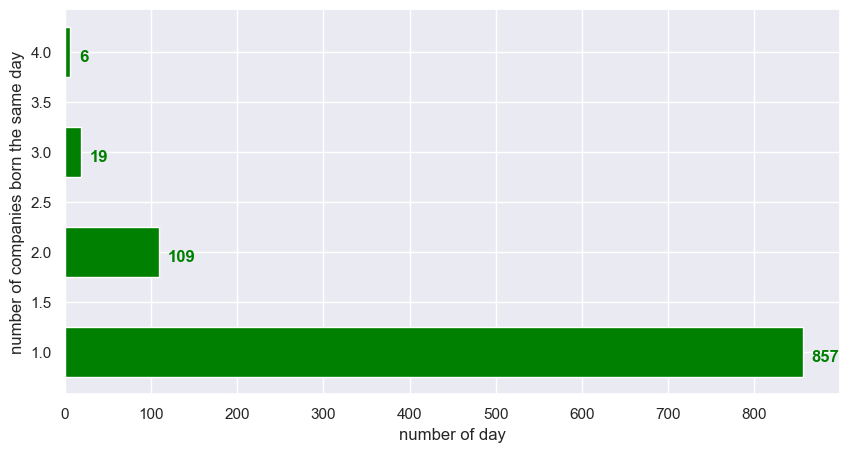

1 July 2020        4
20 April 2022      4
25 January 2021    4
26 April 2021      4
25 October 2021    4
                  ..
14 April 2016      1
14 July 2022       1
18 April 2013      1
9 April 1990       1
17 August 2021     1
Name: company_creation_date, Length: 991, dtype: int64

In [8]:
# print(df['company_creation_date'].value_counts())
creation_date = df['company_creation_date'].value_counts()

#dati necessari per stabilire quanti sono i giorni in cui sono nate contemporaneamente lo stesso numero di aziende
#NUMERO DI GIORNI IN CUI UN CERTO NUMERO DI AZIENDE è NATO LO STESSO GIORNO
num_date, num_companies = numpy.unique(creation_date.values, return_counts=True)
print(dict(zip(num_date, num_companies)))

fig, ax = plt.subplots()
width = 0.5
fig.set_size_inches(10, 5)
ind = np.arange(len(values))
ax.barh(num_date, num_companies, width, color = "green")

for i, v in enumerate(num_companies):
    ax.text(v + 10, i + 0.9 , str(v),
            color = 'green', fontweight = 'bold')
plt.xlabel("number of day")
plt.ylabel("number of companies born the same day")
plt.show()

keys = creation_date.index
values = creation_date.values

creation_date


62012 - Business and domestic software development                            117
62020 - Information technology consultancy activities                         105
56290 - Other food services                                                    58
56103 - Take-away food shops and mobile food stands                            51
82990 - Other business support service activities not elsewhere classified     47
70229 - Management consultancy activities other than financial management      45
99999 - Dormant Company                                                        35
62090 - Other information technology service activities                        30
47910 - Retail sale via mail order houses or via Internet                      27
96090 - Other service activities not elsewhere classified                      25
Name: nature_of_business, dtype: int64


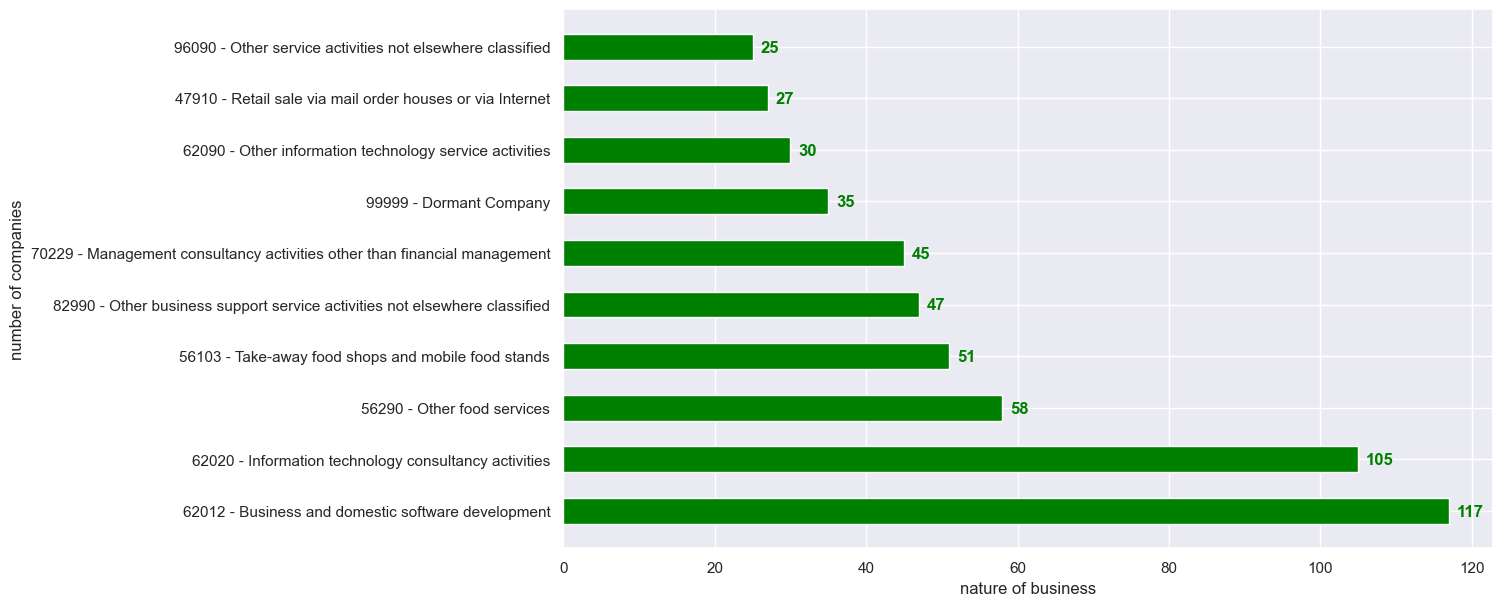

In [9]:
#take only the most important natures of the business
nature_of_business = df['nature_of_business'].value_counts().head(10)
print(nature_of_business)

keys = nature_of_business.index
values = nature_of_business.values

#creation of graph for type_companies
fig, ax = plt.subplots()
width = 0.5
fig.set_size_inches(12, 7)
ind = np.arange(len(values))
ax.barh(keys, values, width, color = "green")

for i, v in enumerate(values):
    ax.text(v + 1, i - 0.1 , str(v),
            color = 'green', fontweight = 'bold')
plt.xlabel("nature of business")
plt.ylabel("number of companies")
plt.show()

In [10]:
#here the idea is to perform a comparison between "companies_status" and "nature_of_business" in a graphs
nature_of_business = df[['company_status','nature_of_business']].value_counts()
nature_of_business


company_status  nature_of_business                                                                     
Active          62012 - Business and domestic software development                                         102
                62020 - Information technology consultancy activities                                       91
                56290 - Other food services                                                                 46
                82990 - Other business support service activities not elsewhere classified                  44
                70229 - Management consultancy activities other than financial management                   42
                                                                                                          ... 
                70221 - Financial management                                                                 1
                71112 - Urban planning and landscape architectural activities                                1
        

In [11]:
#extract country
import pycountry

country_list = list()
country_address = df.registered_office_address.values

for text in country_address:
    for country in pycountry.countries:
        if country.name in text:
            print(country.name)
            country_list.append(country.name)

print(country_list)

United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
Chad
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
Chad
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
Mali
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kin

In [12]:
#extract country
import pycountry

headquarters_list = list()
for i in df.registered_office_address:
    if i is not None:
        headquarters_list.append(i)

print(len(headquarters_list))


country_list = list()
for text in headquarters_list:
    for country in pycountry.countries:
        if country.name in text:
            # print(country.name)
            country_list.append(country.name)

# print(country_list)
print(len(country_list))

country_to_count = dict()
for i in country_list:
    if i not in country_to_count.keys():
        country_to_count[i] = 1
    else:
        country_to_count[i] += 1

print(country_to_count)
d = {'CountryName': country_to_count.keys(), 'User_Percent': country_to_count.values()}
df_country = pd.DataFrame(data=d)
# df_country.User_Percent = df_country.User_Percent.apply(lambda x: int(x)/len(country_list))

df_country

1156
307
{'United Kingdom': 296, 'Chad': 4, 'Mali': 1, 'Ireland': 3, 'China': 1, 'Jordan': 2}


,CountryName,User_Percent
0,United Kingdom,296
1,Chad,4
2,Mali,1
3,Ireland,3
4,China,1
5,Jordan,2


In [22]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown'
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown'
    return (cn_a2_code, cn_continent)

list_tuple = list()
for i in df_country.CountryName:
    list_tuple.append(get_continent(i))

print(len(list_tuple))
df_country = df_country.assign(codes = list_tuple)
print(list_tuple[0][0])
df_country = df_country.assign(Country = list(zip(*list_tuple))[0])
df_country = df_country.assign(Continent = list(zip(*list_tuple))[1])
df_country

6
GB


,CountryName,User_Percent,codes,Country,Continent
0,United Kingdom,296,"(GB, EU)",GB,EU
1,Chad,4,"(TD, AF)",TD,AF
2,Mali,1,"(ML, AF)",ML,AF
3,Ireland,3,"(IE, EU)",IE,EU
4,China,1,"(CN, AS)",CN,AS
5,Jordan,2,"(JO, AS)",JO,AS


In [23]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="http")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

list_tuple = list()
for i in df_country.CountryName:
    list_tuple.append(geolocate(i))

print(len(list_tuple))
df_country = df_country.assign(Geolocate = list_tuple)
print(list_tuple[0][0])
df_country = df_country.assign(Latitude = list(zip(*list_tuple))[0])
df_country = df_country.assign(Longitude = list(zip(*list_tuple))[1])
df_country

6
54.7023545


,CountryName,User_Percent,codes,Country,Continent,Geolocate,Latitude,Longitude
0,United Kingdom,296,"(GB, EU)",GB,EU,"(54.7023545, -3.2765753)",54.702354,-3.276575
1,Chad,4,"(TD, AF)",TD,AF,"(15.6134137, 19.0156172)",15.613414,19.015617
2,Mali,1,"(ML, AF)",ML,AF,"(16.3700359, -2.2900239)",16.370036,-2.290024
3,Ireland,3,"(IE, EU)",IE,EU,"(52.865196, -7.9794599)",52.865196,-7.979460
4,China,1,"(CN, AS)",CN,AS,"(35.000074, 104.999927)",35.000074,104.999927
5,Jordan,2,"(JO, AS)",JO,AS,"(31.1667049, 36.941628)",31.166705,36.941628


In [24]:
# Create a world map to show distributions of users
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df_country)):
        lat = df_country.iloc[i]['Latitude']
        long = df_country.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of #Companies : {}<br>"""
        popup_text = popup_text.format(df_country.iloc[i]['Country'],
                                   df_country.iloc[i]['User_Percent']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True, weight = 5).add_to(marker_cluster)
#show the map
world_map


In [25]:
from folium import plugins

from folium.plugins import HeatMap


heat_data = [[row['Latitude'],row['Longitude']] for index, row in df_country.iterrows()]

map = folium.Map(location=[0, 0], zoom_start = 1)


# Plot it on the map

HeatMap(heat_data).add_to(map)

# Display the map

map

# TEMPI ESTRAZIONI

In [13]:
# Opening JSON file
file_name_time = './../output/output_govuk_time.json'

df_time = pd.read_json(file_name_time)

In [14]:
df_time

,name,company_number,registered_office_address,company_status,company_type,company_creation_date,nature_of_business,time
0,FOOD LIMITED,01797494,"Cannon Place, 78 Cannon Street, London, Englan...",Active,Private limited Company,6 March 1984,74990 - Non-trading company,0.005080
1,SOFTWARE LTD.,SC144127,"214 214 Holburn St, Aberdeen, Scotland, AB10 6DB",Active,Private limited Company,29 April 1993,62012 - Business and domestic software develop...,0.005620
2,CERES ASSOCIATES LTD,13981992,"3a Hillside Road, Radlett, England, WD7 7BH",Active,Private limited Company,16 March 2022,"74909 - Other professional, scientific and tec...",0.005222
3,ALL LTD.,02293426,"20 Ashridge Gardens, Pinner, Middlesex, HA5 1DU",Active,Private limited Company,6 September 1988,74990 - Non-trading company,0.005746
4,SOFTWARE ACADEMY LIMITED,10428742,"71 Cricklewood Broadway, London, England, NW2 3JR",Active,Private limited Company,14 October 2016,62090 - Other information technology service a...,0.005642
...,...,...,...,...,...,...,...,...
1114,FOOD DEVELOPMENT CORPORATION LTD,07009732,"C/O Michael Filiou Ltd Salisbury House, 81 Hig...",Active,Private limited Company,4 September 2009,70221 - Financial management,0.004710
1115,FOOD DESIRE LTD.,09619480,"27 Exeter Road, Feltham, England, TW13 5NY",Active,Private limited Company,2 June 2015,56210 - Event catering activities,0.004238
1116,FOOD DIMENSION PRIVATE LIMITED,14158059,"40 King Street, London, England, E13 8DQ",Active,Private limited Company,8 June 2022,56103 - Take-away food shops and mobile food s...,0.004447
1117,FOOD DIRECT LIMITED,12544284,Unit 24 Chiltern Trading Estate Earl Howe Road...,Active,Private limited Company,2 April 2020,"46390 - Non-specialised wholesale of food, bev...",0.008912


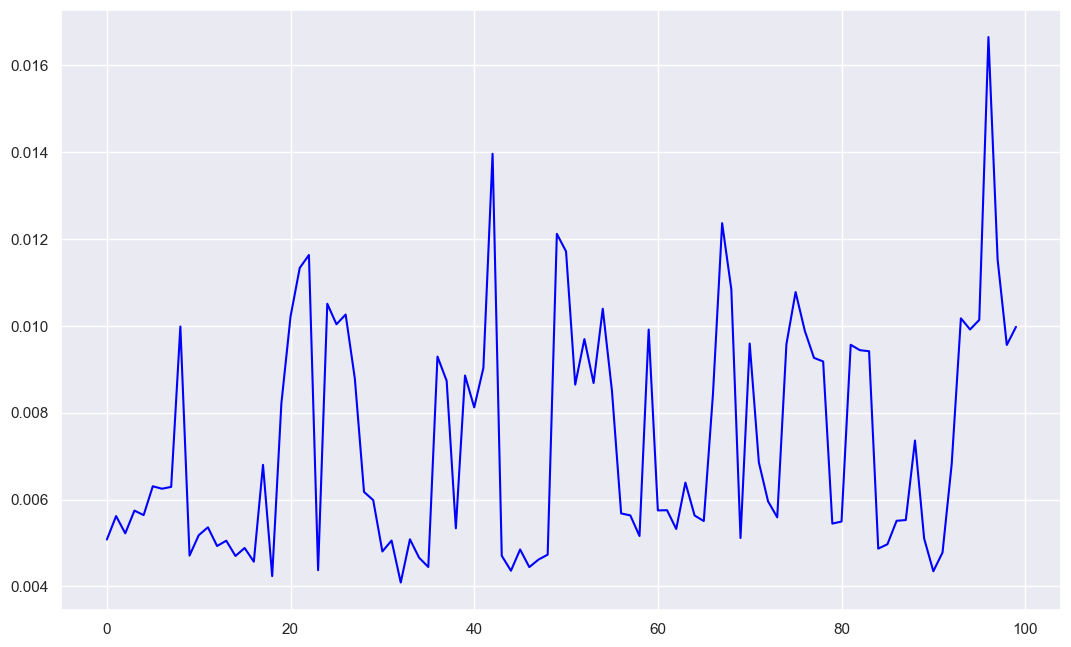

In [15]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.plot(df_time.head(100).index, df_time.head(100)['time'], color='blue')

In [16]:
times = [[100, df_time.head(100)['time'].min(), df_time.head(100)['time'].mean(), df_time.head(500)['time'].median(),
          df_time.head(1000)['time'].max()]]
df_table = pd.DataFrame(times, columns=['Estrazioni', 'Minimo', 'Media', 'Mediana', 'Massimo'])
df_table

,Estrazioni,Minimo,Media,Mediana,Massimo
0,100,0.00409,0.007338,0.005471,0.018615


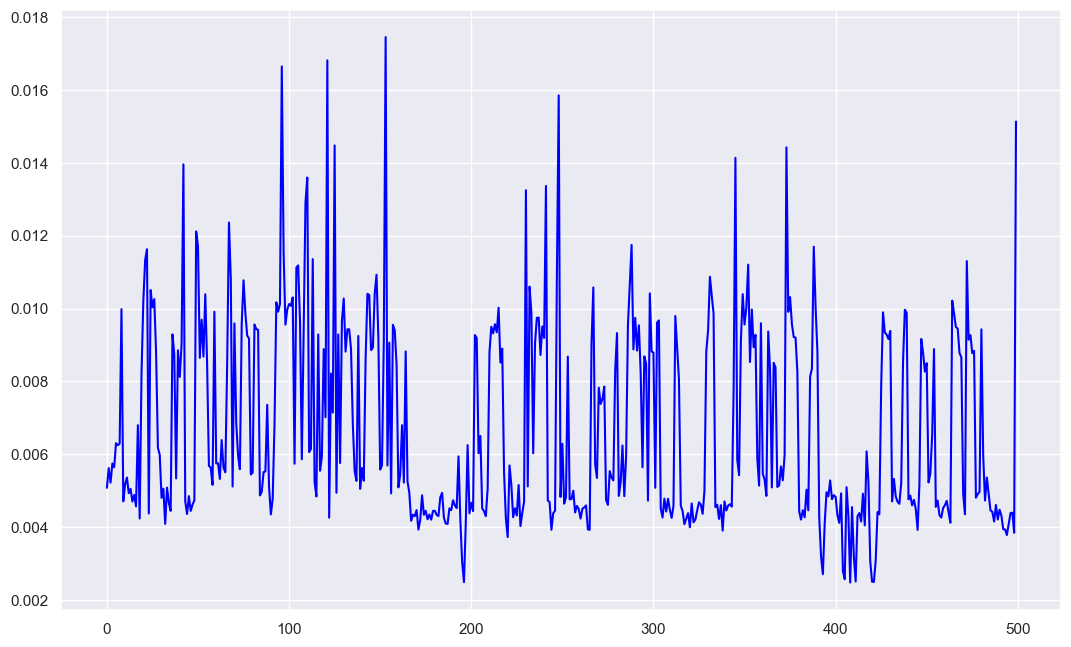

In [17]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.plot(df_time.head(500).index, df_time.head(500)['time'], color='blue')

In [18]:
times = [[500, df_time.head(500)['time'].min(), df_time.head(500)['time'].mean(), df_time.head(500)['time'].median(),
          df_time.head(500)['time'].max()]]
df_table = pd.DataFrame(times, columns=['Estrazioni', 'Minimo', 'Media', 'Mediana', 'Massimo'])
df_table

,Estrazioni,Minimo,Media,Mediana,Massimo
0,500,0.002479,0.00672,0.005471,0.017454


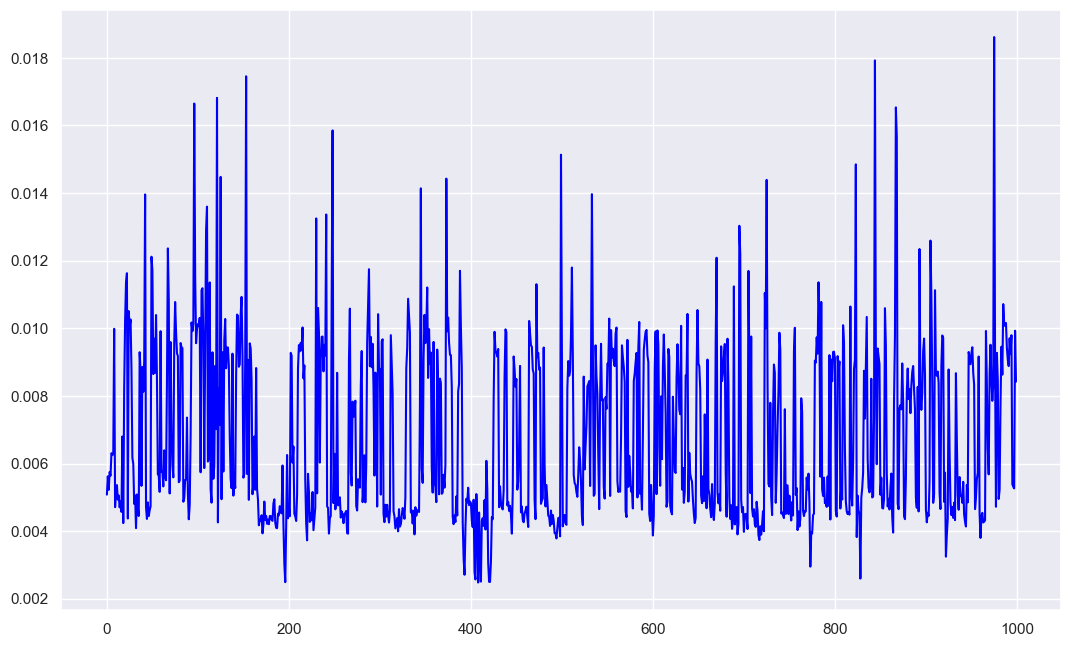

In [19]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.plot(df_time.head(1000).index, df_time.head(1000)['time'], color='blue')

In [20]:
times = [[1000, df_time.head(1000)['time'].min(), df_time.head(1000)['time'].mean(), df_time.head(1000)['time'].median(),
          df_time.head(1000)['time'].max()]]
df_table = pd.DataFrame(times, columns=['Estrazioni', 'Minimo', 'Media', 'Mediana', 'Massimo'])
df_table

,Estrazioni,Minimo,Media,Mediana,Massimo
0,1000,0.002479,0.006784,0.005595,0.018615


In [21]:
# print(df_table.Massimo)
time = df_time.head(1)['time'].astype('float').values[0]
value = df_table.Massimo.values[0]
mask = df_time['time'].astype('float') == value
filtered_df = df_time[df_time['time']== value]
filtered_df

,name,company_number,registered_office_address,company_status,company_type,company_creation_date,nature_of_business,time
975,FOOD BITES LIMITED,12233357,"147 Greenbrow Road, Manchester, England, M23 2DB",Active,Private limited Company,30 September 2019,47290 - Other retail sale of food in specialis...,0.018615
